This function divides a set of points into two classes, those found above the line, and those found below the line. This function doesnt include points that lie on the line as they do not provide any added value to the calculations

In [2]:
def divide_points(graph, left, right):
  """
  params:
  graph => set of points
  left => leftmost point within the referenced graph
  right => rightmost point within the referenced graph

  returns:
  a tuple of two arrays
  """
  above_seg, below_seg = [], []

  for point in graph:
      segment = (point[1] - left[1]) * (right[0] - left[0]) - (right[1] - left[1]) * (point[0] - left[0])
      if segment > 0:
          above_seg.append(point)
      if segment < 0:
          below_seg.append(point)

  return above_seg, below_seg

Pseudocode

    function divide_points(S, p1, p2)
      above_segment := []
      below_segment := []

      for s ∈ S do
        segment <- (s[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (s[0] - p1[0])
        if segment > 0 then
          above_segment <- s

        else if segment < 0 then
          below_segment <- s

    return above_segment, below_segment

In [1]:
# calcultates the distances of a point from the straigh line
point_distance = lambda left, right, point: abs((point[1] - left[1]) * (right[0] - left[0]) - (right[1] - left[1]) * (point[0] - left[0]))

def find_hull(graph, left, right, convex_hull, side):
    """
    graph => set of points
    left => leftmost point within the referenced graph
    right => rightmost point within the referenced graph
    convex_hull => containing points forming the convex hull
    side => indicates if currently exploring the above segment or below segment
    """
    # if graph conatins values
    if graph:

        # initialise max
        max_point_dist = float('-inf')
        max_point = (0, 0)

        # for each point in the graph, find its distance
        # update maximum distance if bigger than the curr max
        for point in graph:
            distance = point_distance(left, right, point)
            if distance > max_point_dist:
                max_point_dist = distance
                max_point = point

        # once furthest point is established, two new lines extend from left, right to max_point
        # use the new lines to further divide points into two subsets again
        first_divide = divide_points(graph, left, max_point)
        sec_divide = divide_points(graph, max_point, right)

        # side == 0 indicates above segment, vice versa
        # depending on the side we are in, the side containing potential solutions will differ, therefore side param used to guide this
        if side == 0:

          find_hull(first_divide[0], left, max_point, convex_hull, 0)
          find_hull(sec_divide[0], max_point, right, convex_hull, 0)

        else:

          find_hull(first_divide[1], left, max_point, convex_hull, 1)
          find_hull(sec_divide[1], max_point, right, convex_hull, 1)

    # if no points in graph, therefore no further points to explore
    # therefore append points to convex hull as they exist in the graphs extremities
    else:
        if left not in convex_hull:
            convex_hull.append(left)
        if right not in convex_hull:
            convex_hull.append(right)

Pseudocode

    point_distance <- lambda(left, right, point) {abs((point[1] - left[1]) * (right[0] - left[0]) - (right[1] - left[1]) * (point[0] - left[0]))}

    function find_hull(S, left, right, convex_hull, side):

        max_point_dist <- negative infinity
        max_point <- (0, 0)

        for s ∈ S do
            distance <- point_distance(left, right, s)
            if distance > max_point_dist tgen
                max_point_dist <- distance
                max_point <- s

        first_divide <- divide_points(S, left, max_point)
        sec_divide <- divide_points(graph, max_point, right)

        if side == 0 then
            find_hull(first_divide[0], left, max_point, convex_hull, 0)
            find_hull(sec_divide[0], max_point, right, convex_hull, 0)
        else do
            find_hull(first_divide[1], left, max_point, convex_hull, 1)
            find_hull(sec_divide[1], max_point, right, convex_hull, 1)

    else:
        if left not in convex_hull then
            append left to convex_hull
        if right not in convex_hull then
            append right to convex_hull

In [3]:
def quick_hull(graph):

    # containing all points forming the convex hull
    convex_hull = []

    # finding the leftmost and rightmost points in the graoh
    left, right = min(graph), max(graph)

    # by default these points are in the convex hull
    convex_hull.append(left)
    convex_hull.append(right)

    # segment these points into its subsets
    above, below = divide_points(graph, left, right)

    # recursively find other points forming the convex hull
    find_hull(above, left, right, convex_hull, 0)
    find_hull(below, left, right, convex_hull, 1)

    return convex_hull

Pseudocode

    function quick_hull(set)
  
      convex_hull := [] // list containing all points in the convex hull

      //if multiple values exist for left/right pick any
      left <- minimum(set)
      right <- maximum(set)

      convex_hull <- left, right //initial points selected are extremities and therfore automatically included in convex hull

      // split set into two subsets
      above, below <- divide_points(set, left, right)

      find_hull(above, left, right, convex_hull, 0)
      find_hull(below, left, right, convex_hull, 1)
    
     return convex_hull
  

In [5]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np
import random


# generates a size n array of x,y coordinates, to be used to test functionality of quickhull
def create_testcases(n):
    coordinates = [(random.randint(0, 10), random.randint(0, 10)) for _ in range(n)]
    return coordinates

In [10]:
test = create_testcases(20)
test

[(1, 7),
 (5, 3),
 (9, 7),
 (0, 7),
 (4, 10),
 (3, 5),
 (4, 5),
 (3, 7),
 (0, 1),
 (3, 8),
 (3, 0),
 (6, 1),
 (7, 1),
 (7, 6),
 (10, 8),
 (2, 8),
 (9, 9),
 (8, 6),
 (5, 1),
 (10, 1)]

In [12]:
# scipy convex hull calculation
scipy_hull = ConvexHull(test)
scipy_solution = set(tuple(test[i]) for i in scipy_hull.vertices)

In [13]:
quick_hull_sol = quick_hull(test)
assert set(quick_hull_sol) == scipy_solution # checking if the expected solution matches what i returned
print(quick_hull_sol) # outputing solution

[(0, 1), (10, 8), (0, 7), (4, 10), (9, 9), (3, 0), (10, 1)]


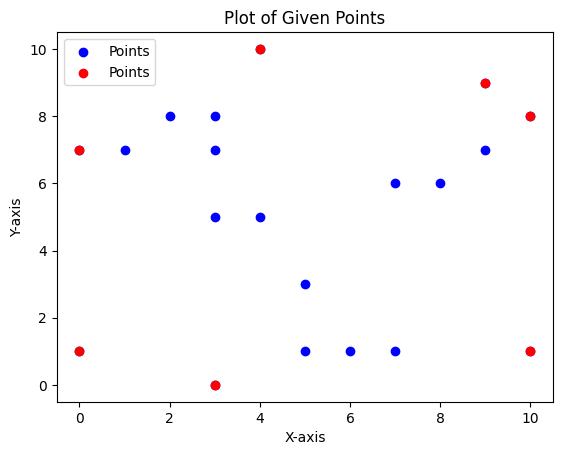

In [14]:

allx_coords, ally_coords = zip(*test)
plt.scatter(allx_coords, ally_coords, color='blue', marker='o', label='Points')

x_coords, y_coords = zip(*quick_hull_sol)
plt.scatter(x_coords, y_coords, color='red', marker='o', label='Points')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Given Points')

plt.legend()

plt.show()